Comencemos por importar las librerías necesarias

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Ahora hagamos una función que calcule la deformación

In [5]:
def deformacion(X1, X2, t):
    x1 = np.exp(t)*X1 - np.exp(-t)*X2
    x2 = np.exp(t)*X1 + np.exp(-t)*X2
    return x1, x2

Consideremos el cuadrado unitario en coordenadas materiales

In [6]:
N = 101
X1, X2 = np.meshgrid(np.linspace(0, 1, N), np.linspace(0, 1, N))

Y grafiquemos

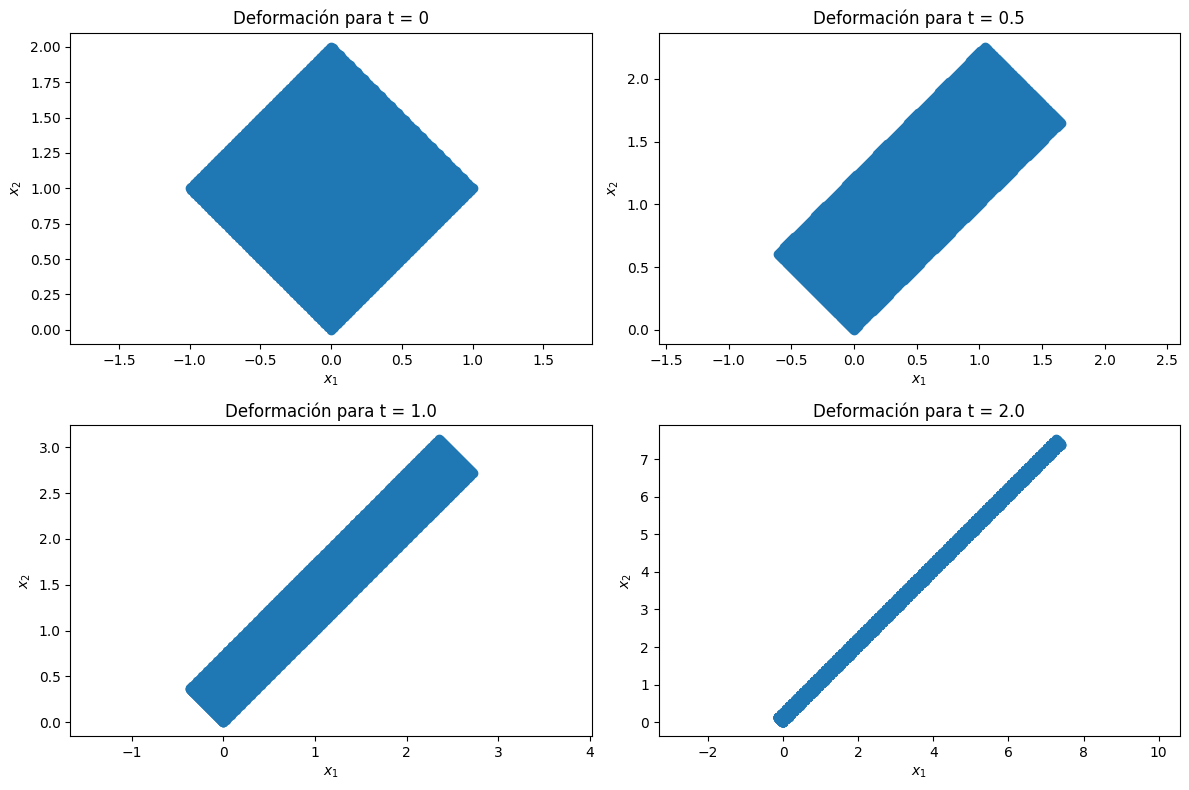

In [7]:
times = [0, 0.5, 1.0, 2.0]

plt.figure(figsize=(12, 8))
for i in range(len(times)):
    t = times[i]
    plt.subplot(2, 2, i + 1)
    x1, x2 = deformacion(X1, X2, t)
    plt.scatter(x1, x2)
    plt.title(f'Deformación para t = {t}')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.axis('equal')
plt.tight_layout()
plt.show()

Podemos ver que a lo largo del tiempo el cuerpo se estira en la diagonal principal y se contrae en la antidiagonal principal. Ahora veamos la norma de Frobenius de $C$, recordemos que $F$ corresponde a 
$$F = \begin{bmatrix}
           e^{t} & -e^{-t} \\
           e^{t} & e^{-t}
    \end{bmatrix}
$$
Y recordemos que $C$ se define como
$$C = F^TF$$
También tenemos una función que nos entregue la norma de Frobenius.

Disclaimer: Ya se que $C$ es constante en $t$ pero quiero hacer el procedimiento completo para que sea más general.

In [8]:
def F(t):
    a, b = np.exp(t), np.exp(-t)
    Fx = np.array([[ a, -b], [ a,  b]])
    return Fx

def C(Fx):
    return Fx.T @ Fx

def Fro(A):
    return np.linalg.norm(A, ord='fro')

Y grafiquemos, primero en la configuración de Referencia

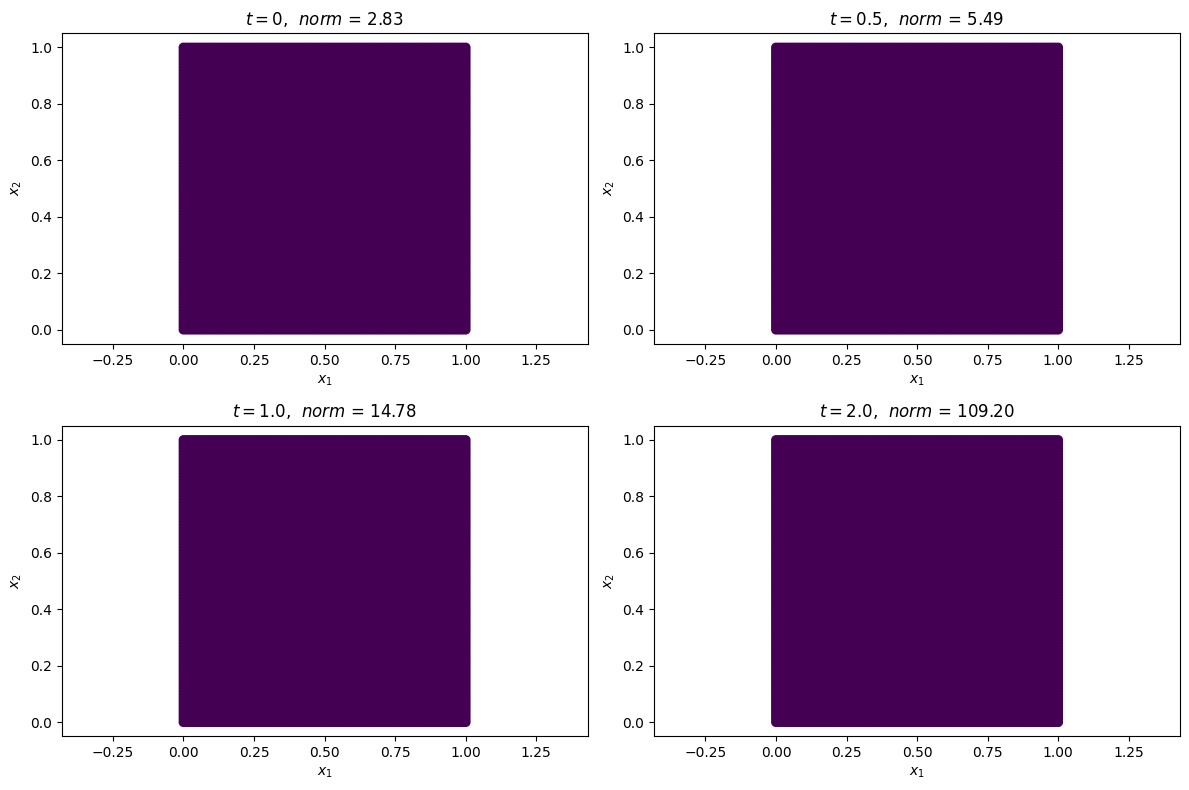

In [9]:
times = [0, 0.5, 1.0, 2.0]

plt.figure(figsize=(12, 8))
for i in range(len(times)):
    t = times[i]
    plt.subplot(2, 2, i + 1)
    Fx = F(t)
    Cx = C(Fx)
    valor = Fro(Cx)
    col = np.full_like(X1, valor)
    sc = plt.scatter(X1, X2, c=col)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(f'$t={t}$,  $norm$ = {valor:.2f}')
    plt.axis('equal')
plt.tight_layout()
plt.show()

Y ahora en la configuración deformada

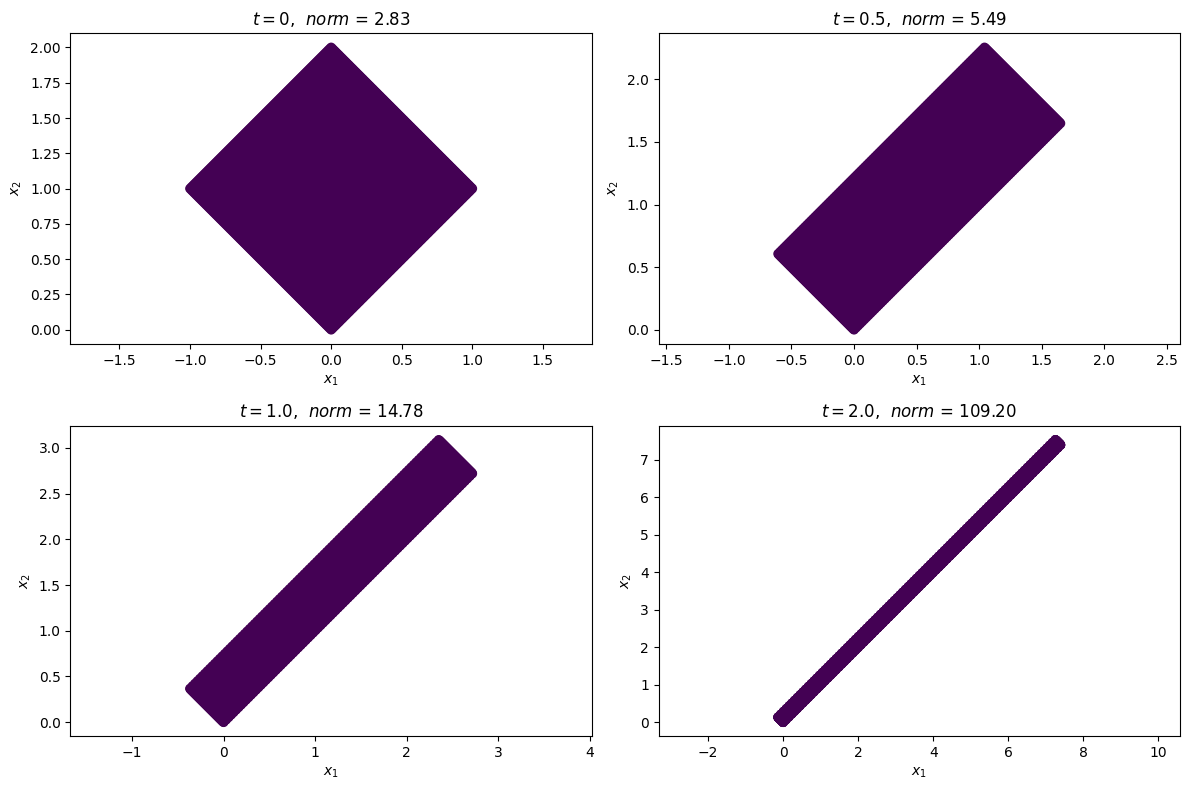

In [10]:
times = [0, 0.5, 1.0, 2.0]

plt.figure(figsize=(12, 8))
for i in range(len(times)):
    t = times[i]
    plt.subplot(2, 2, i + 1)
    x1, x2 = deformacion(X1, X2, t)
    Fx = F(t)
    Cx = C(Fx)
    valor = Fro(Cx)
    col = np.full_like(x1, valor)
    sc = plt.scatter(x1, x2, c=col)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(f'$t={t}$,  $norm$ = {valor:.2f}')
    plt.axis('equal')
plt.tight_layout()
plt.show()

Podemos ver que el tensor es constante en todo el dominio, puesto que depende solamente de $t$. Si no fuera constante me imagino que no tendría una buena interpretación en la configuración deformada. Lo anterior se debe a que en la configuración deformada, según lo que investigué en internet, lo más razonable es usar el tensor izquierdo de Cauchy-Green, el cual se define como
$$B = FF^T$$
Implementemos este tensor 

In [11]:
def B(Fx):
    return Fx @ Fx.T

Grafiquemos en la configuración deformada

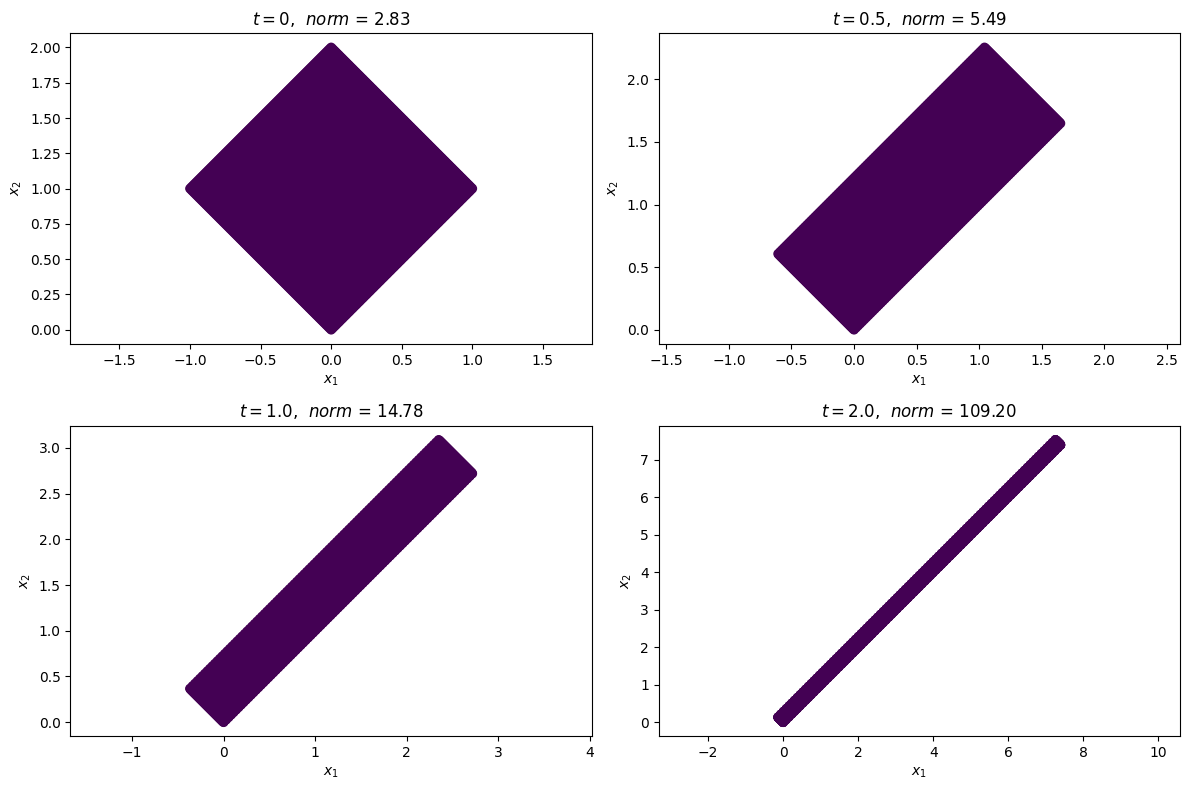

In [12]:
times = [0, 0.5, 1.0, 2.0]

plt.figure(figsize=(12, 8))
for i in range(len(times)):
    t = times[i]
    plt.subplot(2, 2, i + 1)
    x1, x2 = deformacion(X1, X2, t)
    Fx = F(t)
    Bx = B(Fx)
    valor = Fro(Bx)
    col = np.full_like(x1, valor)
    sc = plt.scatter(x1, x2, c=col)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(f'$t={t}$,  $norm$ = {valor:.2f}')
    plt.axis('equal')
plt.tight_layout()
plt.show()

Y en la de referencia

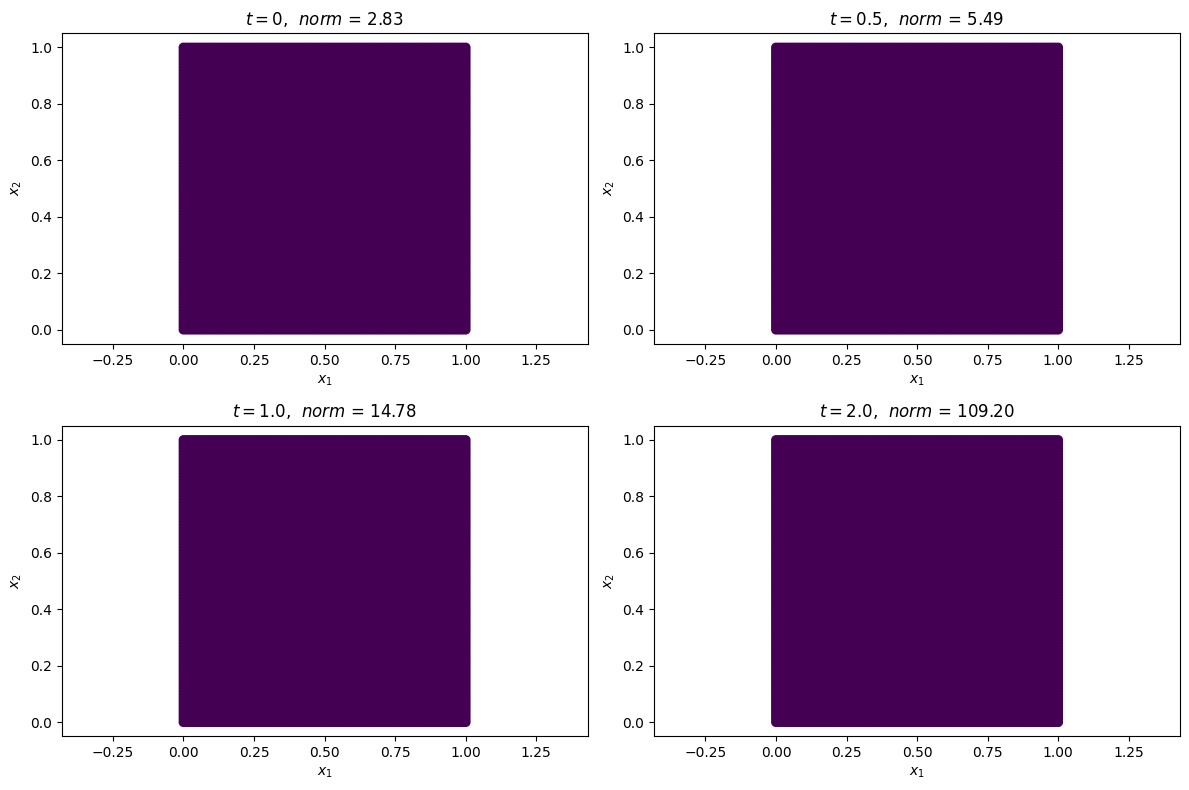

In [13]:
times = [0, 0.5, 1.0, 2.0]

plt.figure(figsize=(12, 8))
for i in range(len(times)):
    t = times[i]
    plt.subplot(2, 2, i + 1)
    Fx = F(t)
    Bx = B(Fx)
    valor = Fro(Bx)
    col = np.full_like(X1, valor)
    sc = plt.scatter(X1, X2, c=col)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(f'$t={t}$,  $norm$ = {valor:.2f}')
    plt.axis('equal')
plt.tight_layout()
plt.show()

Y honestamente no tiene mucho sentido el ejercicio, pero me imagino que si $F$ dependiera de $X$, entonces si tendría sentido y haría más sentido $B$ para el deformado y $C$ para el de referencia :v